# Data Analysis Examples

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir = "/content/drive/My Drive/" + "_python/"

## 1. 2012 Federal Election Commission Database 살펴보기

In [14]:
# 파일 읽기 
fec = pd.read_csv(data_dir+'/P00000001-ALL.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
# 데이터 개수
len(fec)

1001731

In [22]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [23]:
fec.tail()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...,SA17A,751678
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678
1001730,C00500587,P20003281,"Perry, Rick","ANDERSON, MARILEE MRS.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,2500.0,31-AUG-11,NaN,NaN,NaN,SA17A,751678


In [24]:
fec.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


## 1-0 null값
각 컬럼마다 null 값을 찾고, 너무 많은 비율로 비어있는 경우 삭제 

In [30]:
fec.isnull().sum()

cmte_id                   0
cand_id                   0
cand_nm                   0
contbr_nm                 0
contbr_city              19
contbr_st                 4
contbr_zip              111
contbr_employer       13729
contbr_occupation      8430
contb_receipt_amt         0
contb_receipt_dt          0
receipt_desc         987565
memo_cd              909249
memo_text            903961
form_tp                   0
file_num                  0
dtype: int64

In [31]:
fec.isnull().sum()/len(fec)

cmte_id              0.000000
cand_id              0.000000
cand_nm              0.000000
contbr_nm            0.000000
contbr_city          0.000019
contbr_st            0.000004
contbr_zip           0.000111
contbr_employer      0.013705
contbr_occupation    0.008415
contb_receipt_amt    0.000000
contb_receipt_dt     0.000000
receipt_desc         0.985858
memo_cd              0.907678
memo_text            0.902399
form_tp              0.000000
file_num             0.000000
dtype: float64

In [0]:
# 'receipt_desc','memo_cd', 'memo_text' 항목 삭제 
fec.drop(['receipt_desc','memo_cd', 'memo_text'], axis=1, inplace=True)

## 1-1
컬럼 'cand_nm' 의 유니크한 값들만 추출해서 unique_cands 라는 변수명에 할당해보기.

In [34]:
unique_cands =fec['cand_nm'].unique()  #  fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

## 1-2
해당 후보의 소속 정당을 parties라는 변수로 알 수 있음.   
integer index 107635 부터 107645 사이에 있는 각 후보가 어떤 정당 소속인지 확인해보기.  

In [0]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [36]:
fec['cand_nm'][107635:107645].map(parties)   # fec.cand_nm[107635:107645].map(parties)

107635    Republican
107636    Republican
107637    Republican
107638    Republican
107639    Republican
107640      Democrat
107641      Democrat
107642      Democrat
107643      Democrat
107644      Democrat
Name: cand_nm, dtype: object

## 1-3
1. 소속 정당을 새로운 컬럼(컬럼명: party)으로 추가 해보기
2. party가 잘 추가 되었는지 fec 의 columns 들만 프린트해보기

In [37]:
fec['party'] = fec.cand_nm.map(parties)
fec.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'form_tp', 'file_num',
       'party'],
      dtype='object')

## 1-4
컬럼 'party'가 Democrat, Republican 가 몇 개의 값을 갖는지 카운트해보기.

In [38]:
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

## 1-5
컬럼 'contb_receipt_amt' 은 기부금액 - 환급금액을 의미.  
기부금액-환급금액이 양수인 것만 의미가 있다고 가정하고, 'contb_receipt_amt'이 양수면 True, 음수면 False를 반환하기

In [39]:
fec['contb_receipt_amt']>0

0          True
1          True
2          True
3          True
4          True
           ... 
1001726    True
1001727    True
1001728    True
1001729    True
1001730    True
Name: contb_receipt_amt, Length: 1001731, dtype: bool

## 1-6
컬럼 'contb_receipt_amt' 은 기부금액 - 환급금액을 의미.  
이 컬럼이 양수인 데이터만 살펴볼 것이므로 fec 데이터 프레임에 컬럼 'contb_receipt_amt'이 양수인지 아닌지 판별하는 불리언 배열을 조건으로 사용하여 양수인 데이터만 포함되게 할 것. 

In [40]:
# 변경 전
(fec.contb_receipt_amt > 0).value_counts() # fec.contb_receipt_amt이 양수인 것과 음수인 것의 개수를 확인.

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [0]:
'''
 'contb_receipt_amt'이 양수인 데이터만 포함 되도록 코드 작성하기 
'''
fec = fec[fec.contb_receipt_amt > 0]

In [42]:
# 변경 후
(fec.contb_receipt_amt > 0).value_counts() # fec.contb_receipt_amt이 양수인 것과 음수인 것의 개수를 세보자.

True    991475
Name: contb_receipt_amt, dtype: int64

# 2. Donation Statistics by Occupation and Employer

직업에 따른 기부 내역을 살펴보자.  
변호사는 민주당에 더 많은 돈을 기부하고, 기업 임원은 공화당에 더 많은 돈을 기부하는 경향이 있다고 하는데 실제로도 맞는지 확인해보자. 

In [43]:
# 직업의 유니크한 것의 개수를 보면 상당히 많음을 알 수 있다. 
len(fec.contbr_occupation.unique())

45068

## 2-1
컬럼 'contbr_occupation'을 통해 직업군 중 상위 10개를 살펴보자. 

In [45]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

## 2-2-1 
컬럼 'contbr_occupation'의 직업군의 종류를 살펴보니 몇몇 항목이 같거나 비슷한 의미를 지녔는데 다른 이름을 가진 것을 알 수 있음.  
(예: 'C.E.O.'와 'CEO')  
occ_mapping을 통해 하나의 직업을 다른 직업으로 매핑해주어 이 문제를 해결해 볼 것.


In [0]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

In [0]:
f = lambda x: occ_mapping.get(x, x)

In [0]:
'''
occ_mapping을 통해 하나의 직업을 다른 직업으로 매핑해주어 이 문제를 해결해 볼 것.
힌트: 컬럼 'contbr_occupation'의 element-wise로 함수 f가 적용시킴
'''
fec.loc['contbr_occupation'] = fec.contbr_occupation.map(f) 

## 2-2-1 
기부자의 고용주 역시 같은 문제를 겪고 있음.  
emp_mapping을 이용하여 해결해볼 것.




In [0]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}


In [0]:
f = lambda x: emp_mapping.get(x, x)

In [0]:
'''
emp_mapping을 통해 하나의 직업을 다른 직업으로 매핑해주어 이 문제를 해결해 볼 것.
힌트: 컬럼 'contbr_employer'의 element-wise로 함수 f가 적용시킴
'''
fec.loc['contbr_employer'] = fec.contbr_employer.map(f)

## 피봇 테이블

In [60]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [62]:
# 최소 2백만불 이상 기부한 직업만 골라내기
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
round(over_2mm)

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141983.0,7477194.0
CEO,2074975.0,4211041.0
CONSULTANT,2459913.0,2544725.0
ENGINEER,951526.0,1818374.0
EXECUTIVE,1355161.0,4138850.0
HOMEMAKER,4248876.0,13634276.0
INVESTOR,884133.0,2431769.0
LAWYER,3160479.0,391224.0
MANAGER,762883.0,1444532.0


In [63]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

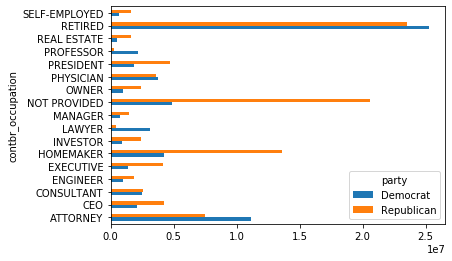

In [64]:
over_2mm.plot(kind='barh')

## 후보별로 가장 많은 금액을 기부한 직업군을 알아보기


## 2-3
'Obama, Barack', 'Romney, Mitt' 두 후보가 양대 후보이므로  
두 후보의 데이터만 추출해서 fec_mrbo 라는 변수명으로 저장해보기.  
(컬럼 'cand_nm' 사용) 

In [0]:
'''
 'cand_nm'이 'Obama, Barack', 'Romney, Mitt'인 데이터만 포함된 데이터를 fec_mrbo라는 변수에 저장하기 
'''
fec_mrbo = fec[fec['cand_nm'].isin(['Obama, Barack', 'Romney, Mitt'])]

In [0]:
# 두 후보의 데이터만 있는 fec_mrbo 데이터에 후보별로 그룹화.
grouped = fec_mrbo.groupby('cand_nm')

In [0]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [68]:
# get_top_amounts 라는 함수를 적용하여 가장 많이 기부한 기부자의 직업군을 구할 수 있다.  
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2324297.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [69]:
# get_top_amounts 라는 함수를 적용하여 가장 많이 기부한 '기부자의 고용주의 직업군'을 구할 수 있다.  
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### 기부 금액 

기부 금액과 같은 데이터는 규모별로 버킷을 만들어 살펴보는 것이 좋다. 적절한 규모를 설정해서 pd.cut 함수를 이용해 해당 데이터 각각이 어디에 속하는지 알아본다.

In [70]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] <
                                  (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [71]:
# 후보와 기부금액(버킷별) 둘로 그룹지어본다. 
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [75]:
## unstack 기능
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [76]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

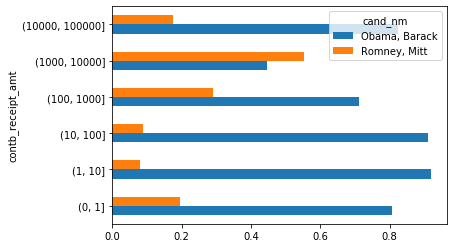

In [77]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums
normed_sums[:-2].plot(kind='barh')   ## 기부금액 가장 큰 버킷은 개인회원이 아니어서 그래프에서 제외시키고자 한다.

### 주(state) 별 기부 통계

In [78]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,56405.00,135.00
AB,2048.00,0.00
AE,42973.75,5680.00
AK,281840.15,86204.24
AL,543123.48,527303.51
...,...,...
WI,1130155.46,270316.32
WV,169154.47,126725.12
WY,194046.74,252595.84


In [79]:
# 두 후보의 기부 금액의 합이 100000인 것을 가져온다.
totals = totals[totals.sum(axis=1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [80]:
# 각 로우를 전체 기부금액으로 나누면 각 후보에 대한 주별 전체 기부금액의 상대적인 비율을 얻을 수 있음. 
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
